## By: Pranav Raj

# To classify Gene-Sequence dataset using different Classification models, and checking for the best performing model. Using evaluation metrics.

In [1]:
import sys
import numpy as np
import sklearn
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the USI Molucular Biology (Promoter Gene Sequences) dataset

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)

In [3]:
print(data.iloc[0])

Class                                                       +
id                                                        S10
Sequence    \t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
Name: 0, dtype: object


In [4]:
classes = data.loc[:, 'Class']
print(classes[:5])

0    +
1    +
2    +
3    +
4    +
Name: Class, dtype: object


In [5]:
#generating list of DNAs
sequences = list(data.loc[:, 'Sequence'])
dataset = {}

#loop through sequence and split into indivisual nucleotides 
for i, seq in enumerate(sequences):

  #split into nucleotides, remove tab characters
  nucleotides = list(seq)
  nucleotides = [x for x in nucleotides if x != '\t']

  #append class assignment
  nucleotides.append(classes[i])

  #add to dataset
  dataset[i] = nucleotides

print(dataset[0])

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [6]:
#turning dataset into pandas Dataframe
dframe = pd.DataFrame(dataset)
dframe.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a


In [7]:
#transpose the dataframe
df = dframe.transpose()
print(df.iloc[:5])    

  0  1  2  3  4  5  6  7  8  9   ... 48 49 50 51 52 53 54 55 56 57
0  t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t  +
1  t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a  +
2  g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g  +
3  a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c  +
4  t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g  +

[5 rows x 58 columns]


In [8]:
#rename the last dataframe column 
df.rename(columns = {57: 'Class'}, inplace = True)
print(df.iloc[:5])

   0  1  2  3  4  5  6  7  8  9  ... 48 49 50 51 52 53 54 55 56 Class
0  t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t     +
1  t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a     +
2  g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g     +
3  a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c     +
4  t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g     +

[5 rows x 58 columns]


In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,c,t,+
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [10]:
series = []
for name in df.columns:
  series.append(df[name].value_counts())

info = pd.DataFrame(series)
details = info.transpose()
print(details)

      0     1     2     3     4     5     6     7     8     9  ...    48  \
t  38.0  26.0  27.0  26.0  22.0  24.0  30.0  32.0  32.0  28.0  ...  21.0   
c  27.0  22.0  21.0  30.0  19.0  18.0  21.0  20.0  22.0  22.0  ...  36.0   
a  26.0  34.0  30.0  22.0  36.0  42.0  38.0  34.0  33.0  36.0  ...  23.0   
g  15.0  24.0  28.0  28.0  29.0  22.0  17.0  20.0  19.0  20.0  ...  26.0   
+   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
-   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

     49    50    51    52    53    54    55    56  Class  
t  22.0  23.0  33.0  35.0  30.0  23.0  29.0  34.0    NaN  
c  42.0  31.0  32.0  21.0  32.0  29.0  29.0  17.0    NaN  
a  24.0  28.0  27.0  25.0  22.0  26.0  24.0  27.0    NaN  
g  18.0  24.0  14.0  25.0  22.0  28.0  24.0  28.0    NaN  
+   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   53.0  
-   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   53.0  

[6 rows x 58 columns]


In [11]:
#making dummy variables
numerical_df = pd.get_dummies(df)
numerical_df.iloc[:5]

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [12]:
#dropping unnecessary class columns
df = numerical_df.drop(columns = ['Class_-'])

df.rename(columns = {'Class_+': 'Class'}, inplace = True)
print(df.iloc[:5])

   0_a  0_c  0_g  0_t  1_a  1_c  1_g  1_t  2_a  2_c  ...  54_t  55_a  55_c  \
0    0    0    0    1    1    0    0    0    0    1  ...     0     0     0   
1    0    0    0    1    0    0    1    0    0    1  ...     0     1     0   
2    0    0    1    0    0    0    0    1    1    0  ...     0     0     1   
3    1    0    0    0    1    0    0    0    0    0  ...     0     0     0   
4    0    0    0    1    0    1    0    0    0    0  ...     1     1     0   

   55_g  55_t  56_a  56_c  56_g  56_t  Class  
0     1     0     0     0     0     1      1  
1     0     0     1     0     0     0      1  
2     0     0     0     0     1     0      1  
3     0     1     0     1     0     0      1  
4     0     0     0     0     1     0      1  

[5 rows x 229 columns]


In [13]:
#seperating training and testing dataset
from sklearn import model_selection

X = np.array(df.drop(['Class'], 1))
y = np.array(df['Class'])

In [14]:
#Defining seed for reproducibility 
seed = 1

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state = seed)

In [15]:
#Importing algorithms from sklearn, and performance metrics such as accuracy_score and classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

#define scoring method
scoring = 'accuracy'

#Defining models to train
names = ["Nearest Neighbors", "Gaussian Process", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes", "SVM Linear", "SVM RBF", "SVM Sigmoid"]

classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth = 5),
    RandomForestClassifier(max_depth=5, n_estimators= 10, max_features = 1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(kernel = 'linear'),
    SVC(kernel = 'rbf'),
    SVC(kernel = 'sigmoid')
]

models = zip(names, classifiers)

#evaluate each model in turn
results = []
names = []

for name, model in models:
  kfold = model_selection.KFold(n_splits = 10)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Nearest Neighbors: 0.837500 (0.125623)
Gaussian Process: 0.873214 (0.056158)
Decision Tree: 0.750000 (0.201556)
Random Forest: 0.673214 (0.157922)
Neural Net: 0.887500 (0.087500)
AdaBoost: 0.912500 (0.112500)
Naive Bayes: 0.837500 (0.137500)
SVM Linear: 0.850000 (0.108972)
SVM RBF: 0.887500 (0.067315)
SVM Sigmoid: 0.900000 (0.093541)


In [16]:
#Checking evaluations on test data, since that matters, as it generalises the model

models = zip(names, classifiers)
for name, model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(name)
  print(accuracy_score(y_test, predictions))
  print(classification_report(y_test, predictions))

Nearest Neighbors
0.7777777777777778
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.62      1.00      0.77        10

    accuracy                           0.78        27
   macro avg       0.81      0.82      0.78        27
weighted avg       0.86      0.78      0.78        27

Gaussian Process
0.8888888888888888
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.77      1.00      0.87        10

    accuracy                           0.89        27
   macro avg       0.88      0.91      0.89        27
weighted avg       0.91      0.89      0.89        27

Decision Tree
0.7407407407407407
              precision    recall  f1-score   support

           0       1.00      0.59      0.74        17
           1       0.59      1.00      0.74        10

    accuracy                           0.74        27
   macro avg       0.7

**SVM Linear** gives the best results, when compared to other models.

With measures like:

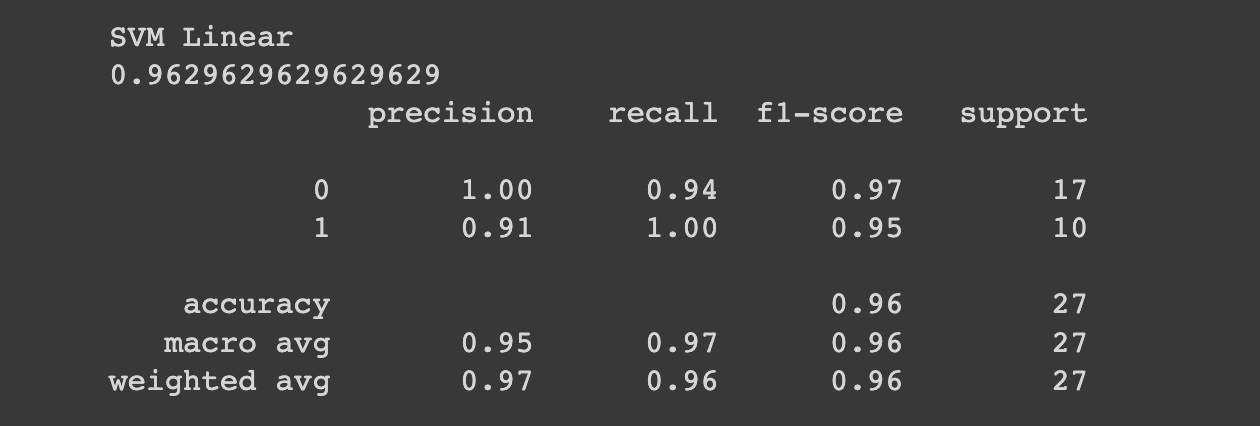